In [133]:
import pandas as pd

In [134]:
df = pd.read_csv("Data_Dealers.csv")

/tmp/ipykernel_37898/2947454965.py:1: DtypeWarning: Columns (11,12,15,17,20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Data_Dealers.csv")


In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 314092 entries, 0 to 314091
Data columns (total 25 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   Order-Id              314092 non-null  object
 1   Created_Date          314092 non-null  object
 2   Time                  314092 non-null  object
 3   Sender                314092 non-null  object
 4   Receiver              33304 non-null   object
 5   Reseller Path         314092 non-null  object
 6   Parent Reseller       314092 non-null  object
 7   Seller Reseller Type  314092 non-null  object
 8   Order-Type            314092 non-null  object
 9   Product               314092 non-null  object
 10  Amount                314092 non-null  object
 11  Receiver-Msisdn       310163 non-null  object
 12  SIM_serial            48412 non-null   object
 13  Balance-before        314092 non-null  object
 14  Balance-after         314092 non-null  object
 15  SellerMSISDN     

In [144]:
pd.to_numeric(df['Amount'], errors='coerce')

0         4.0
1         1.0
2         0.0
3         0.0
4         4.0
         ... 
314087    3.0
314088    0.0
314089    0.0
314090    4.0
314091    1.0
Name: Amount, Length: 314092, dtype: float64

In [145]:
df['Amount'] = df['Amount'].fillna(0)

In [20]:
df.describe()

,Order-Id,Created_Date,Time,Sender,Receiver,Reseller Path,Parent Reseller,Seller Reseller Type,Order-Type,Product,...,SellerMSISDN,SellerName,Quantity,PaymentMode,PaymentAgreement,TransactionNumber,City,Area,Region,ProductName
count,314092,314092,314092,314092,33304,314092,314092,314092,314092,314092,...,314092,314092,314092,314092,281008,3.140920e+05,298431,314085,314085,314092
unique,175244,32,52952,2454,2124,2453,51,10,6,87,...,4142,2058,62,3,2,4.000000e+00,525,191,178,62
top,OMS-f14d42c5-3f6f-41b4-a55a-000fa45ab09d,31/05/2025,20:36:10,OPERATOR,TIG-Younus786,OPERATOR,ABT1,dealer,ISO,271217760,...,96877334455,OPERATOR,1,CASH,UPFRONT,2.025050e+28,Muscat,Salalah,Muscat,SIM
freq,5,19908,40,25818,1117,25818,130237,131919,280788,50390,...,22894,25818,280160,281007,281007,2.813080e+05,62571,46873,66172,52119


In [136]:
#Q:1
df['datetime'] = df['Created_Date'] + ' ' + df['Time']
print(df[['Created_Date', 'Time', 'datetime']].head())


  Created_Date      Time             datetime
0   31/05/2025  23:59:49  31/05/2025 23:59:49
1   31/05/2025  23:59:37  31/05/2025 23:59:37
2   31/05/2025  23:59:37  31/05/2025 23:59:37
3   31/05/2025  23:59:37  31/05/2025 23:59:37
4   31/05/2025  23:59:37  31/05/2025 23:59:37


In [55]:
#Q:2
total_sales_per_region = df.groupby('Region')['Amount'].sum().reset_index()
print(total_sales_per_region.to_markdown(RangeIndex=False))


            Region                                             Amount
0                0  1020210041004010012000140210012002100012012001...
1     Ad Dahkiliya                                               4441
2    Ad Dakhiliyah  0140100400411001404100401010400140140400114004...
3      Ad Dakhlyia                                    204000410410040
4      Ad Dhahirah  1004104004010041001401400014140000410014014004...
..             ...                                                ...
173           seeb  002411016011080841242000100000840100000129.040...
174         shinas  8818168111162281000810112001012841228821112128...
175          sinaw  00000100001000140001400410000020.6101642200050...
176          sohar  1800104000410000081000001210010001610110001412...
177         suwaiq  0100010001000010801010000100801000100100001000...

[178 rows x 2 columns]


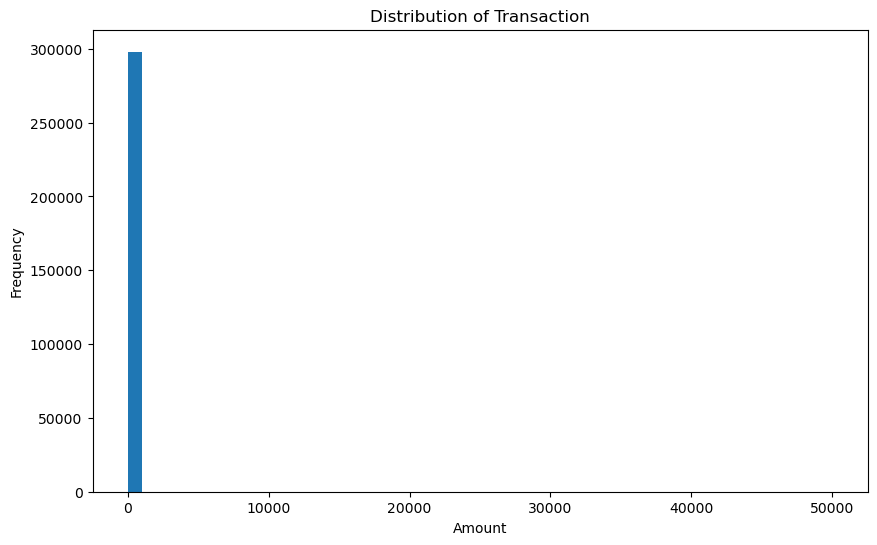

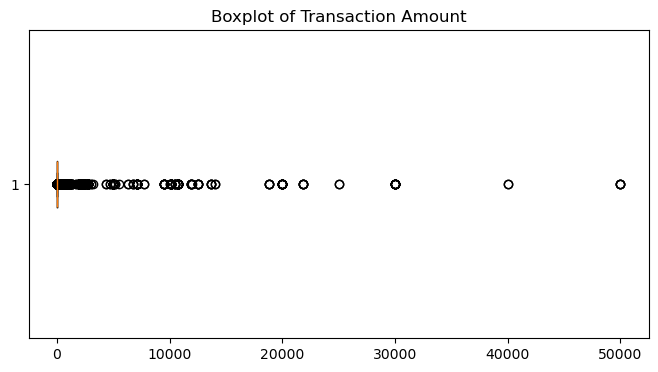

In [347]:
#Q:3
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.hist(df['Amount'], bins=50)
plt.title('Distribution of Transaction')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(8,4))
plt.boxplot(df['Amount'], vert=False)
plt.title('Boxplot of Transaction Amount')
plt.show()

df['Amount'] = df['Amount'].astype(str).str.replace(',', '').str.strip()
df['Amount'] = pd.to_numeric(df['Amount'], errors='coerce')


In [192]:
import pandas as pd
import numpy as np

df['Amount'] = df['Amount'].astype(str).str.replace(',', '', regex=False)

df['Amount'] = pd.to_numeric(df['Amount'], errors='coerce')

df['Amount'] = df['Amount'].fillna(0)


In [199]:
import pandas as pd
import numpy as np

df['ProductName'] = df['ProductName'].astype(str).str.replace(',', '', regex=False)
df['ProductName'] = pd.to_numeric(df['ProductName'], errors='coerce')
df['ProductName'] = df['ProductName'].fillna(0)


df['Quantity'] = df['Quantity'].astype(str).str.replace(',', '', regex=False)
df['Quantity'] = pd.to_numeric(df['Quantity'], errors='coerce')
df['Quantity'] = df['Quantity'].fillna(0)

In [243]:
#Q:4
top_Products_by_Quantity = df.groupby('ProductName')['Quantity'].sum().reset_index(name='Total_Quantity_Sold')
sorted_Products = top_Products_by_Quantity.sort_values(by='Total_Quantity_Sold', ascending=False)
top_5_Products = sorted_Products.head(5)
print(top_5_Products)


     ProductName  Total_Quantity_Sold
0   0.000000e+00             842175.0
5   7.509117e+08               1313.0
3   5.543982e+08                269.0
10  1.471597e+09                133.0
6   1.471596e+09                  4.0


In [277]:

#Q:5
import pandas as pd
from sklearn .preprocessing import LabelEncoder

Le = LabelEncoder()
df['Product_encoded'] = le.fit_transform(df['ProductName'])
print(df[['ProductName', 'Product_encoded']].head())

  ProductName  Product_encoded
0           A                0
1           B                1
2           C                2
3           A                0
4           B                1


In [215]:
#Q:6
import pandas as pd
import numpy as np
df['Amount'] = pd.to_numeric(df['Amount'], errors='coerce')
threshold = df['Amount'].quantile(0.75)

df['Is_High_Value'] = np.where(df['Amount'] > threshold, 1, 0)


In [324]:
print(df.columns.tolist())


['ProductName', 'Product_encoded']


In [357]:
#Q:7

df['Amount'] = pd.to_numeric(df['Amount'].astype(str).str.replace(',', '').str.strip(), errors='coerce')
Q1 = df['Amount'].quantile(0.25)
Q3 = df['Amount'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['Amount'] < lower_bound) | (df['Amount'] > upper_bound)]
print(outliers)


                                        Order-Id Created_Date      Time  \
237     OMS-211016a5-8075-4a95-ae49-5916ddd83899   31/05/2025  23:50:12   
247     OMS-e6286ac2-2999-46e7-ab75-2622b50d4f30   31/05/2025  23:49:20   
347     OMS-bc472476-4ee5-46e0-bf3e-687121f7fe40   31/05/2025  23:45:18   
417     OMS-069515e9-4115-408f-8c5f-53c9bdc3e2b4   31/05/2025  23:42:08   
480     OMS-53b5c398-4458-4a17-af2a-baf60c20840d   31/05/2025  23:39:48   
...                                          ...          ...       ...   
313966  OMS-f9df5e41-8c12-4963-961c-e39e57cf88e6   01/05/2025   0:53:50   
313967  OMS-5b255356-07de-45b5-8908-d59605c7ae53   01/05/2025   0:49:41   
313981  OMS-88afd842-05c8-4e67-b49b-16a828d53051   01/05/2025   0:35:55   
314074  OMS-5b610533-8c17-4358-88da-ba3267bc3638   01/05/2025   0:07:46   
314075  OMS-74613899-80ab-4da1-be80-dd34a75184bc   01/05/2025   0:07:09   

                    Sender Receiver  \
237     abdullah_almoqbali      NaN   
247     abdullah_almo

In [342]:
#Q:8
df['Amount'] = (
    df['Amount']
    .astype(str)
    .str.replace(',', '', regex=False)
    .str.replace(' ', '', regex=False)
    .str.extract(r'(\d+\.?\d*)')
)

df['Amount'] = pd.to_numeric(df['Amount'], errors='coerce')

df['PaymentMode'] = df['PaymentMode'].astype(str).str.upper().str.strip()

comparison = df.groupby('PaymentMode')['Amount'].mean()

print(comparison.loc[['CASH', 'NO_PAYMENT_REQD']])


PaymentMode
CASH                8.323602
NO_PAYMENT_REQD    45.135385
Name: Amount, dtype: float64


In [312]:
#Q:9 KPI
import pandas as pd
df_original['Created_Date'] = pd.to_datetime(df_original['Created_Date'])
daily_sales_count = df_original.groupby('Created_Date').size().reset_index(name='dailysales')
average_daily_sales = daily_sales_count['dailysales'].mean()
print(f"dailysales:{average_daily_sales:.2f}")


dailysales:10119.71


In [339]:
#Q:10
import pandas as pd
df['Amount'] = df['Amount'].astype(str).str.replace(',', '', regex=False)
df['Amount'] = pd.to_numeric(df['Amount'], errors='coerce')
df['Quantity'] = pd.to_numeric(df['Quantity'], errors='coerce')

df = df.dropna(subset=['Amount', 'Quantity', 'City'])

City_summary = df.groupby('City').agg(
    AvgAmount=('Amount', 'mean'),
    AvgQuantity=('Quantity', 'mean')
).reset_index()
City_summary = City_summary.sort_values(by='AvgAmount')
print(City_summary)


                     City   AvgAmount  AvgQuantity
66            Al Khaborah    0.000000     1.000000
385                 SAHAM    0.000000     1.000000
221                 FALAJ    0.000000     1.000000
280  Jalan bani Bu Hassan    0.222222     1.000000
35             Al Batinah    0.250000     1.000000
..                    ...         ...          ...
236               Ghoubra   77.967033     1.000000
7              AL BATINHA  337.666667     1.000000
478   ash sharqiyah south  344.563636    26.257576
316                Mabila  490.451818     1.000000
475               al seeb  573.954545    68.954545

[524 rows x 3 columns]
